# **Imagen 3: Hands On Coding Lab Session**


## **Overview**

### **Imagen 3: Google's Most Advanced Text-to-Image Model**
Imagen 3 is the latest and most capable text-to-image generation model developed by Google DeepMind. It represents a significant leap forward from its predecessor, Imagen 2, focusing on enhanced prompt understanding, photorealism, and particularly, accurate text rendering within images.

### **Agenda**

In this lab session, you will learn how to use the Vertex AI SDK for Python to interact with the Imagen 3/Imagen 3 Fast models to generate images and use other AI model for image verification

## Section 1: **Setting Up**

### **Import libraries**

The **Vertex AI SDK** for Python acts as a bridge between your Python codebase and Google Cloud Platform's (GCP) machine learning services. This makes it easy for you to access and utilize powerful Google AI models, like Imagen for generating images or Gemini for advanced language tasks, directly within your notebooks or other Python environments


In [1]:
import vertexai
from vertexai.preview.vision_models import ImageGenerationModel

### **Initialize Vertex AI**

You need to initialize the Vertex AI SDK to configure it with your specific project ID, and location, to authenticate and communicate with the correct Google Cloud AI services.

In [2]:
PROJECT_ID = "primeval-argon-455018-r9"

vertexai.init(project=PROJECT_ID)
print("Vertex AI Initialized")

Vertex AI Initialized


## **Section 2: Creating Images**







### **Load AI Models**
Here are the current Image Generation AI model you can use:

*   Imagen 3 (latest version) : ```imagen-3.0-generate-002 ```
*   Imagen 3 :  ```imagen-3.0-generate-001 ```
*   Imagen 3 Fast: ```imagen-3.0-fast-generate-001```

In [3]:
imagen_id = "imagen-3.0-fast-generate-001"

imagen = ImageGenerationModel.from_pretrained(imagen_id)

### **Generate your first image**

`generate_images() `function to create images. This function needs two parameters:

- `prompt`: Tells AI what image to create
- `number_of_images`: How many images to generate (up to 4)

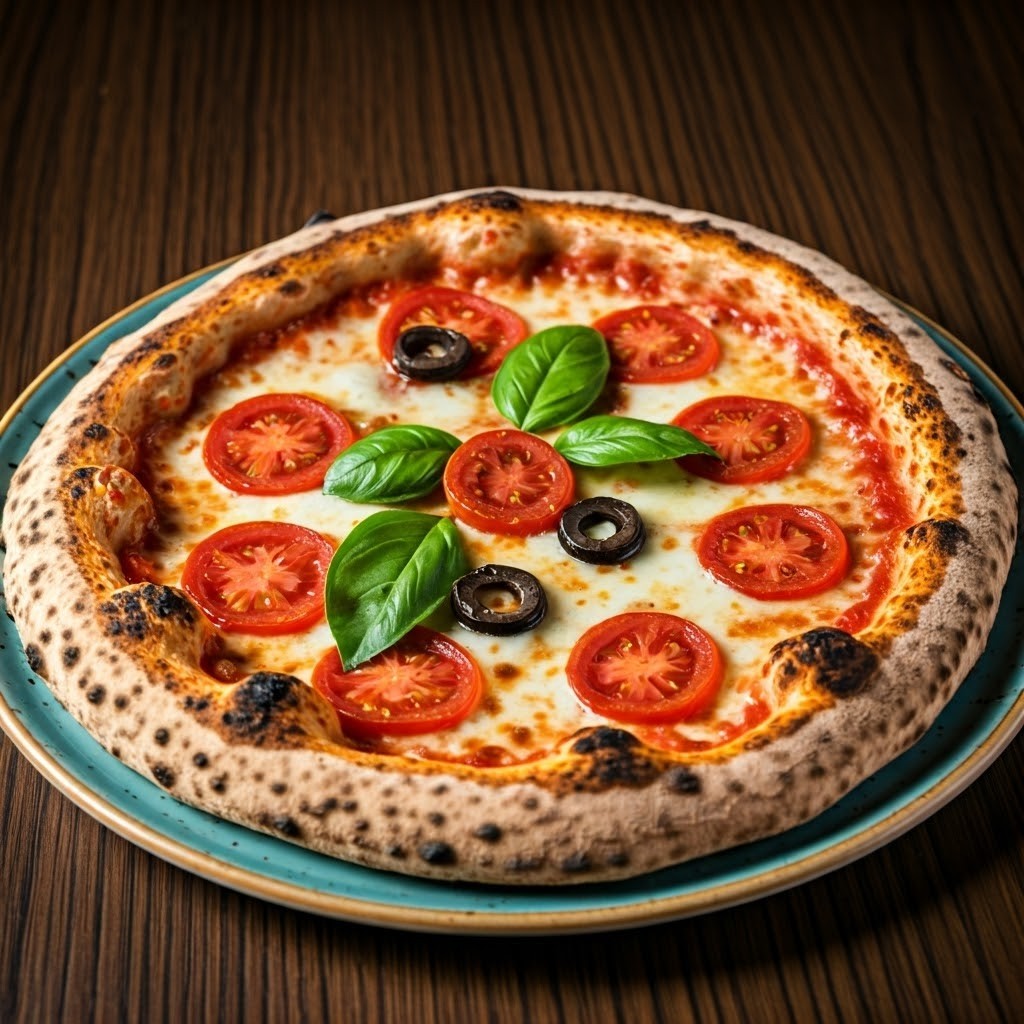

In [4]:
images = imagen.generate_images(
    prompt="a pizza on a plate",
    number_of_images=1
)

images[0].show()

### **Saving your image**

In [6]:
images[0].save("name.png")

### **Exploring Parameters**




You can use extra settings to get images exactly how you want them.
**Note: Optional Parameters only work for the `imagen-3.0-generate-001` and `imagen-3.0-fast-generate-001`**








**Imagen Model Parameters:**

- `negative_prompt` : This tells our AI what not to include in our images. You can list out those things within this the parameter (e.g., "blurry, text, ugly").




- `language`: Offers multilingual support: As of now, supported language are:
  - en: English
  - hi: Hindi
  - ja: Japanese
  - ko: Korean
  - zh: Chinese(simplified)
  - auto: Automatic detection



- `aspect_ratio`: Changes the aspect ratio of the generated image. Supported values are:
  - 1:1 (default)
  - 3:4
  - 4:3
  - 9:16
  - 16:9




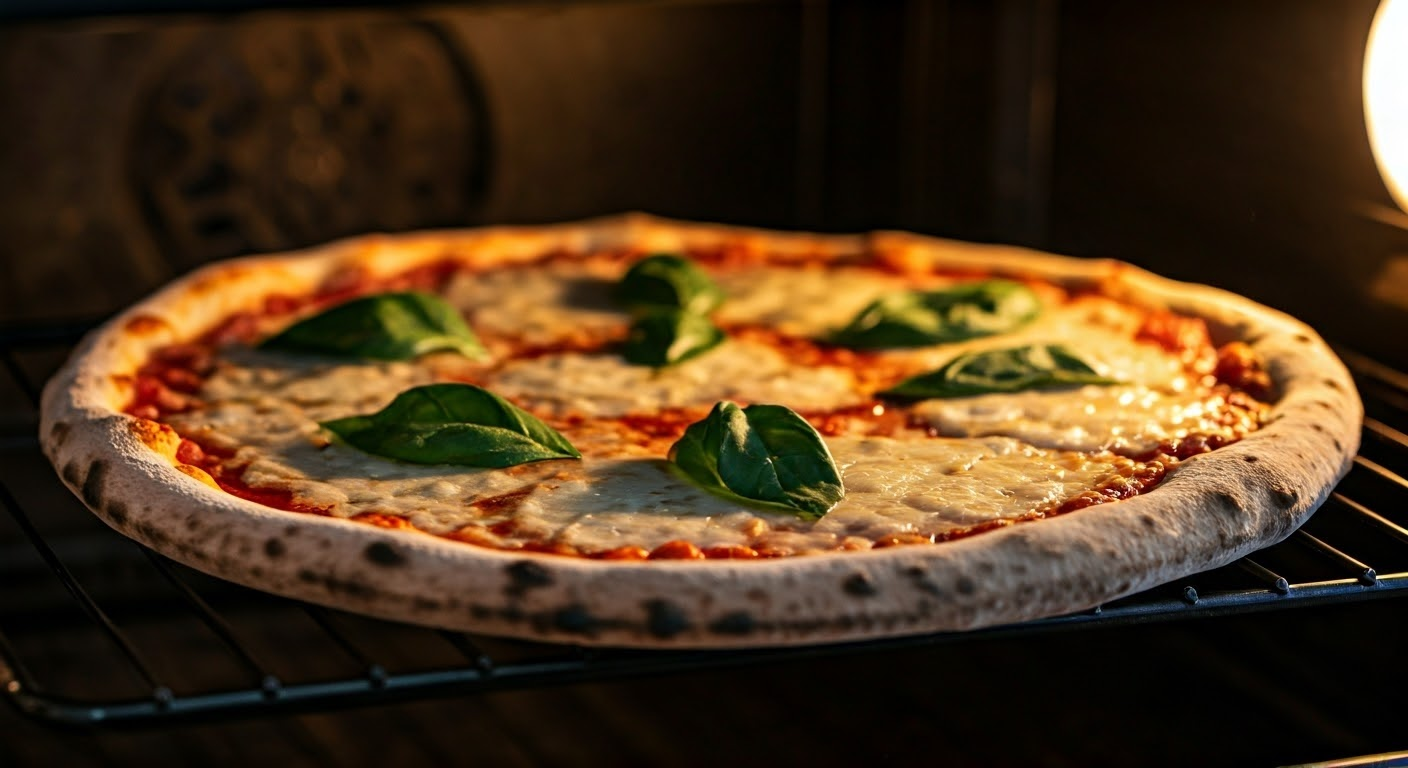

In [17]:
supported_model = "imagen-3.0-fast-generate-001"

model = ImageGenerationModel.from_pretrained(supported_model)

images = model.generate_images(
  prompt="烤箱里的披萨",
  number_of_images=1,
  language="zh",
  aspect_ratio="16:9"
    
)

# Optional. View the generated image in a notebook.
images[0].show()

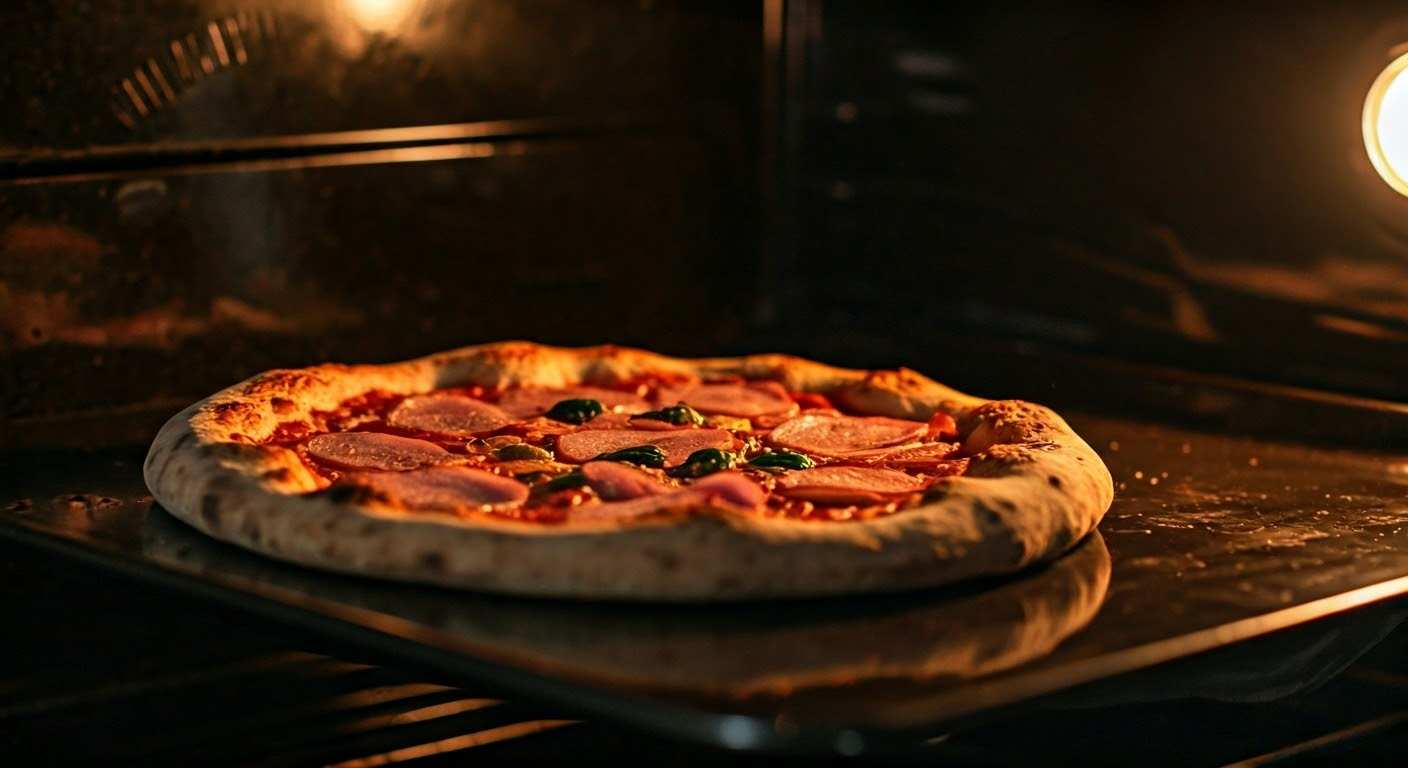

In [18]:
supported_model = "imagen-3.0-fast-generate-001"

model = ImageGenerationModel.from_pretrained(supported_model)

images = model.generate_images(
  prompt="a pizza baking in an oven",
  number_of_images=1,
  negative_prompt="pepperoni,beef,chicken",
  aspect_ratio="16:9"
    
)

# Optional. View the generated image in a notebook.
images[0].show()

## **Section 3: Responsible AI**

### **SynthID Verification**

In [ ]:
from vertexai.preview.vision_models import WatermarkVerificationModel

verification_model = WatermarkVerificationModel.from_pretrained(
    "imageverification@001"
)

watermark_verification_response = verification_model.verify_image(images[0])

if (watermark_verification_response.watermark_verification_result == "ACCEPT"):
    print("This picture is AI Generated")
else:
    print("This picture is real")

In [ ]:
from vertexai.preview.vision_models import Image

filepath = "/home/jupyter/imagentest/dog_image.jpeg"
img = Image.load_from_file(filepath)

watermark_verification_response = verification_model.verify_image(img)

print(watermark_verification_response.watermark_verification_result)

## **Lab Activity: Emoji Scene Maker**


In this fun and creative lab activity, we’ll be building an Emoji Scene Generator! Since Imagen 3 doesn’t quite understand emojis on its own, we’ll get a little help from another awesome Google AI model — Gemini — to bring our emoji-inspired scenes to life. Let’s explore how we can combine the power of different AI tools to turn simple emojis into vivid image prompts!

## Step 1: Importing Libraries



<details>
  <summary>Click here to show the full code</summary>

```

import vertexai
from vertexai.preview.vision_models import ImageGenerationModel
from vertexai.generative_models import GenerativeModel

```

## Step 2: Initialize Vertex AI

<details>
  <summary>Click here to show the full code</summary>

```

PROJECT_ID = ""

vertexai.init(project=PROJECT_ID)

```

## Step 3: Load Models

- Imagen 3 : ```imagen-3.0-generate-002 ```, OR ```imagen-3.0-generate-001 ```, OR ```imagen-3.0-fast-generate-001```
- Gemini 2.0: ```gemini-2.0-flash```

<details>
  <summary>Click here to show the full code</summary>

```

gemini_id = "gemini-2.0-flash"
imagen_id = "imagen-3.0-generate-002"

model = ImageGenerationModel.from_pretrained(imagen_id)
gemini = GenerativeModel(gemini_id)
print("✅ Vertex AI Initialized and models are loaded")
```

## Step 4 : Create Functions for Text and Image Generation

Create two functions:
- emojis_to_prompt : Analyse emojis then generate prompt using Gemini Model
- prompt_to_image : Pass generated prompt from Gemini to Imagen to create our image


**Copy paste this prompt to send to Gemini**
```
        Analyze these emojis: {emojis} .If none is given, choose it yourself.

        Create a short (1-2 sentences) and highly visual scene description
        based *only* on the concepts represented by these emojis. Combine the concepts in an
        unexpected, or absurd way. The description should be suitable as a prompt
        for Imagen 3. ONLY show the short sentence(s) as your response without any other texts.

        
```

<details>
  <summary>Click here to show the full code</summary>

    
```
def emojis_to_prompt(emojis):
    
    funny_prompt = None
    
    prompt_for_gemini = f"""
    Analyze these emojis: {emojis} .If none is given, choose it yourself.

        Create a short (1-2 sentences) and highly visual scene description
        based *only* on the concepts represented by these emojis. Combine the concepts in an
        unexpected, or absurd way. The description should be suitable as a prompt
        for Imagen 3. ONLY show the short sentence(s) as your response without any other texts.
    """
    
    text_response = gemini.generate_content(prompt_for_gemini)    
    funny_prompt = text_response.text.strip()
    
    print("Gemini prompt: " + funny_prompt)
    
    prompt_to_image(funny_prompt)
    
    


def prompt_to_image(prompt):
    
    image = imagen.generate_images(
        prompt=prompt+" Style: Digital Painting",
        number_of_images=1,
        aspect_ratio="4:3",
        negative_prompt="ugly",
        guidance_scale="0"
    )

    image[0].show()

```

## Final Step : Insert Your Emojis!


<details>
    <summary>Click here to show the full code</summary>
        
        
```
emojis = ""

emojis_to_prompt(emojis)
```

## 😀 😃 😄 😁 😆 😅 🤣 😂 🥲 😊 😇 🥰 😍 🤩 😘 😗 😙 😚 🙂 🫠 😉 🤨 🧐 🤓 😎 🥸 😔 🥺 😟 😥 😢 😭 😨 😩 🤯 😬 😮‍💨 🥶 🥵 😳 😱 😖 😞 😓 🤢 🤮 🤧 🤕 🥴 😵‍💫 🤯 😇 🤠 🤡 👹 👺 👻 👽 👾 🤖 👋 🖐️ ✋ 🤚 🖖 👌 🤌 🤏 🤞 🫶 🙏 👏 🙌 🫶 🤝 🫂 👤 👥 👣 🐶 🐱 🐭 🐹 🐰 🦊 🐻 🐼 🐨 🐯 🦁 🐮 🐷 🐸 🐒 🐔 🐧 🐦 🦉 🦇 🦋 🐛 🐜 🐝 🐞 🐌 🦀 🐍 🦎 🐢 🐠 🐡 🐬 🐳 🦈 🐙 🐚 🪴 🌱 🌿 ☘️ 🍀 🍁 🍂 🍃 🌸 🌷 🌹 🌻 🌼 🌺 🍄 🌳 🌴 🌵 🍎 🍏 🍌 🍓 🍇 🍉 🍊 🍋 🥭 🍍 🥝 🥑 🍅 🍆 🥕 🌽 🌶️ 🥔 🧅 🧄 🥦 🥬 🥒 🫑 🍗 🍖 🥓 🍔 🍟 🍕 🌭 🥪 🌮 🌯 🍜 🍝 🍙 🍚 🍛 🍣 🍤 🍦 🍧 🍨 🍩 🍪 🎂 🍰 🧁 🍫 🍬 🍭 🍮 🍯 🍿 🧂 🧈 🍳 🧇 🥞 🥨 🥩 🥪 🥣 🥗 🍿 🥫 🥟 🦪 🍫 🍺 🍻 🥂 🍷 🥃 🍸 🍹 🧉 🧊 🥤 ☕ 🍵 🍶 🍼 🥛 🫖 🫘 ⚽ 🏀 🏈 ⚾ 🥎 🎾 🏐 🏉 🥏 🎳 🏏 🏑 🏒 🥍 🪁 🎣 🛶 🏊 🏄 🚴 🚵 🤸‍♀️ 🏋️‍♂️ 🏌️‍♂️ 🧘‍♀️ 🧗‍♂️ 🏇 🏂 ⛷️ ⛸️ 🏹 🎯 🎮 🎰 🚗 🚕 🚓 🚑 🚒 🚌 🚂 ✈️ 🚀 🚢 🚤 ⛵ 🚲 🛴 🛵 🛸 🛰️ 🚠 🚡 🚦 🚧 ⛽ 🗺️ 🏔️ 🌋 🏜️ 🏝️ 🏞️ 🏖️ 🏕️ 🛤️ 🌅 🌄 🌃 🌠 🎇 🎆 🌈 🌉 🏠 🏘️ 🏰 🏢 🏭 🗼 🗽 🗿 ⌚ 📱 💻 ⌨️ 🖱️ 🖨️ 🕹️ 📸 🔦 📺 📻 💾 💿 📼 📷 📹 🎥 🎬 🎤 🎧 🎼 🎹 🥁 🎷 🎺 🎸 🎻 🪕 🎵 🎶 🎙️ 📻 📱 📞 📟 📠 🔋 🔌 💡 💸 💵 💶 💷 💴 💰 💳 💎 ⚖️ 💼 👜 🎒 👔 👕 👖 👗 👘 🥻 🩱 🩳 🧥 🧤 🧣 🧢 👒 🎓 👑 💍 👓 🥽 💄 💋 👣 🧵 🧶 🪡 🧸 🪁 🪄 🎈 🎉 🎊 🎎 🎏 🎐 🪅 🪆 🎭 🖼️ 🧵 🧶 🪡 🧸 🪁 🪄 🎈 🎉 🎊 🎎 🎏 🎐 🪅 🪆 ⌚ 📱 💻 ⌨️ 🖱️ 🖨️ 🕹️ 📸 🔦 📺 📻 💾 💿 📼 📷 📹 🎥 🎬 🎤 🎧 🎼 🎹 🥁 🎷 🎺 🎸 🎻 🪕 🎵 🎶 🎙️ 📻 📱 📞 📟 📠 🔋 🔌 💡 💸 💵 💶 💷 💴 💰 💳 💎 ⚖️ 💼 👜 🎒 👔 👕 👖 👗 👘 🥻 🩱 🩳 🧥 🧤 🧣 🧢 👒 🎓 👑 💍 👓 🥽 💄 💋 👣 🧵 🧶 🪡 🧸 🪁 🪄 🎈 🎉 🎊 🎎 🎏 🎐 🪅 🪆 🎭 🖼️ 🧵 🧶 🪡 🧸 🪁 🪄 🎈 🎉 🎊 🎎 🎏 🎐 🪅 🪆 🎭 🖼️ 🗺️ 🧭 🧱 🪵 🍷 🍎 🍏 🍌 🍓 🍇 🍉 🍊 🍋 🥭 🍍 🥝 🥑 🍅 🍆 🥕 🌽 🌶️ 🥔 🧅 🧄 🥦 🥬 🥒 🫑 🍗 🍖 🥓 🍔 🍟 🍕 🌭 🥪 🌮 🌯 🍜 🍝 🍙 🍚 🍛 🍣 🍤 🍦 🍧 🍨 🍩 🍪 🎂 🍰 🧁 🍫 🍬 🍭 🍮 🍯 🍿 🧂 🧈 🍳 🧇 🥞 🥨 🥩 🥪 🥣 🥗 🍿 🥫 🥟 🦪 🍫 🍺 🍻 🥂 🍷 🥃 🍸 🍹 🧉 🧊 🥤 ☕ 🍵 🍶 🍼 🥛 🫖 🫘 ⚽ 🏀 🏈 ⚾ 🥎 🎾 🏐 🏉 🥏 🎳 🏏 🏑 🏒 🥍 🪁 🎣 🛶 🏊 🏄 🚴 🚵 🤸‍♀️ 🏋️‍♂️ 🏌️‍♂️ 🧘‍♀️ 🧗‍♂️ 🏇 🏂 ⛷️ ⛸️ 🏹 🎯 🎮 🎰 🚗 🚕 🚓 🚑 🚒 🚌 🚂 ✈️ 🚀 🚢 🚤 ⛵ 🚲 🛴 🛵 🛸 🛰️ 🚠 🚡 🚦 🚧 ⛽ 🗺️ 🏔️ 🌋 🏜️ 🏝️ 🏞️ 🏖️ 🏕️ 🛤️ 🌅 🌄 🌃 🌠 🎇 🎆 🌈 🌉 🏠 🏘️ 🏰 🏢 🏭 🗼 🗽 🗿